In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler


def clustering_process(
    df: pd.DataFrame,
    cluster_method: type[DBSCAN | KMeans],
    scaler_method: type[StandardScaler],
    main_data_columns: list[str] = ["price", "squareMeters", "cityCode"], 
    additional_data_columns: list[str] = ["id"],
    cluster_setup: dict[str, str] = {},
    scaler_setup: dict[str, str] = {}
) -> pd.DataFrame: 
    scaler = scaler_method(**scaler_setup)
    nums = df.loc[:, main_data_columns]
    ids = df.loc[:, additional_data_columns]
    norm_nums = scaler.fit_transform(nums)
    norm = np.column_stack((ids, norm_nums))

    dbscan = cluster_method(**cluster_setup)
    clusters = dbscan.fit_predict(norm_nums)

    processed_df = pd.DataFrame(
        columns=additional_data_columns + main_data_columns + ["cluster_id"])
    i = 0
    for cluster_id in np.unique(clusters):
        cluster_mask = (clusters == cluster_id)
        cluster_data = norm[cluster_mask]
        for data in cluster_data:
            processed_df.loc[i] = list(data) + [cluster_id]
            i += 1

    return processed_df


def cluster_visualize(
    df: pd.DataFrame, 
    x_column: str = "price", 
    y_column: str = "squareMeters", 
    figsize: tuple[int, int] = (10, 10),
    xlabel = "Розмір у м^2",
    ylabel = "Ціна у $",
    title = "Порівняння нерухомості ціна/розмір"
):
    fig, ax = plt.subplots(figsize=figsize)

    for cluster_id in df["cluster_id"].unique():
        cluster_df = df[df["cluster_id"] == cluster_id]
        sct = ax.scatter(cluster_df[x_column], cluster_df[y_column], cmap="viridis", edgecolors="black")
        sct.set_label(f"Cluster: {cluster_id}")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.set_cmap('coolwarm')
    fig.legend(ncols=5)
    
    return fig, ax

In [2]:
train_df = pd.read_csv("datasets/paris_housing_price/train.csv")
test_df = pd.read_csv("datasets/paris_housing_price/test.csv")

/tmp/ipykernel_22070/4279635351.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(cluster_df[x_column], cluster_df[y_column], cmap="viridis", edgecolors="black")


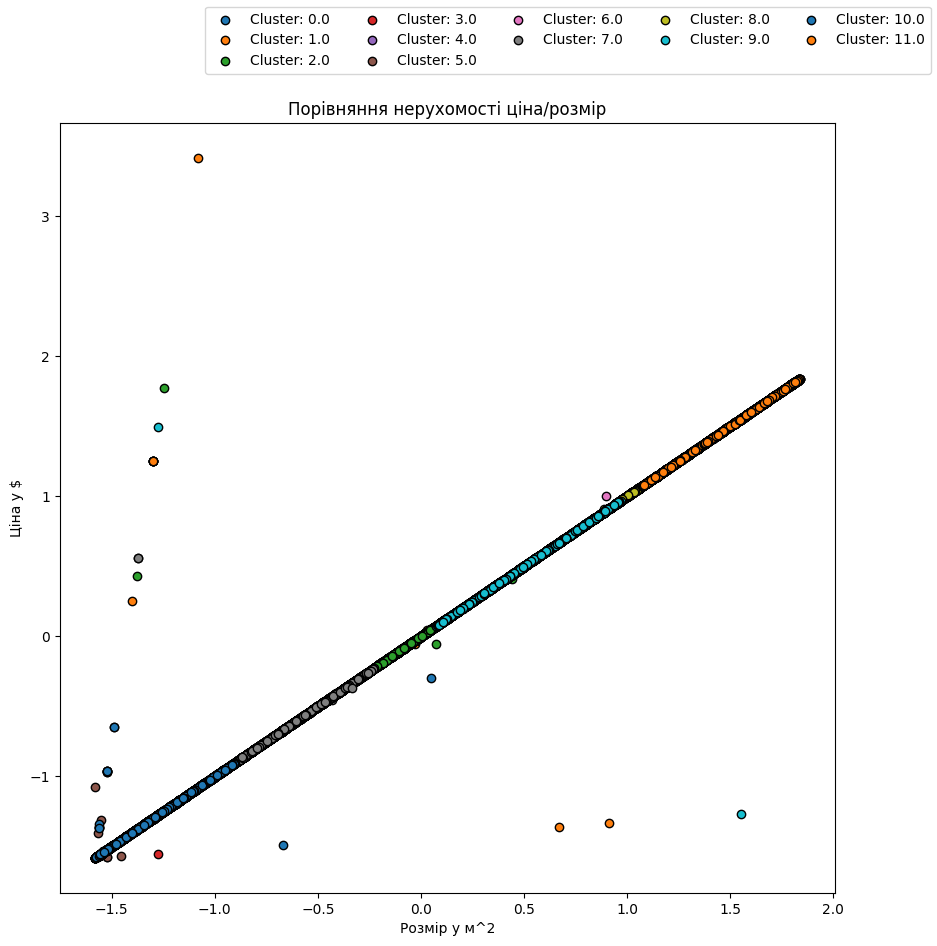

In [3]:
filtered_df = train_df[train_df["squareMeters"] < train_df["squareMeters"].max() * 0.75]
processed_df = clustering_process(
    df=filtered_df,
    cluster_method=KMeans,
    scaler_method=StandardScaler,
    cluster_setup={"n_clusters": 12, "random_state": 3}
)
fig, ax = cluster_visualize(processed_df)
plt.show()

/tmp/ipykernel_22070/4279635351.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(cluster_df[x_column], cluster_df[y_column], cmap="viridis", edgecolors="black")


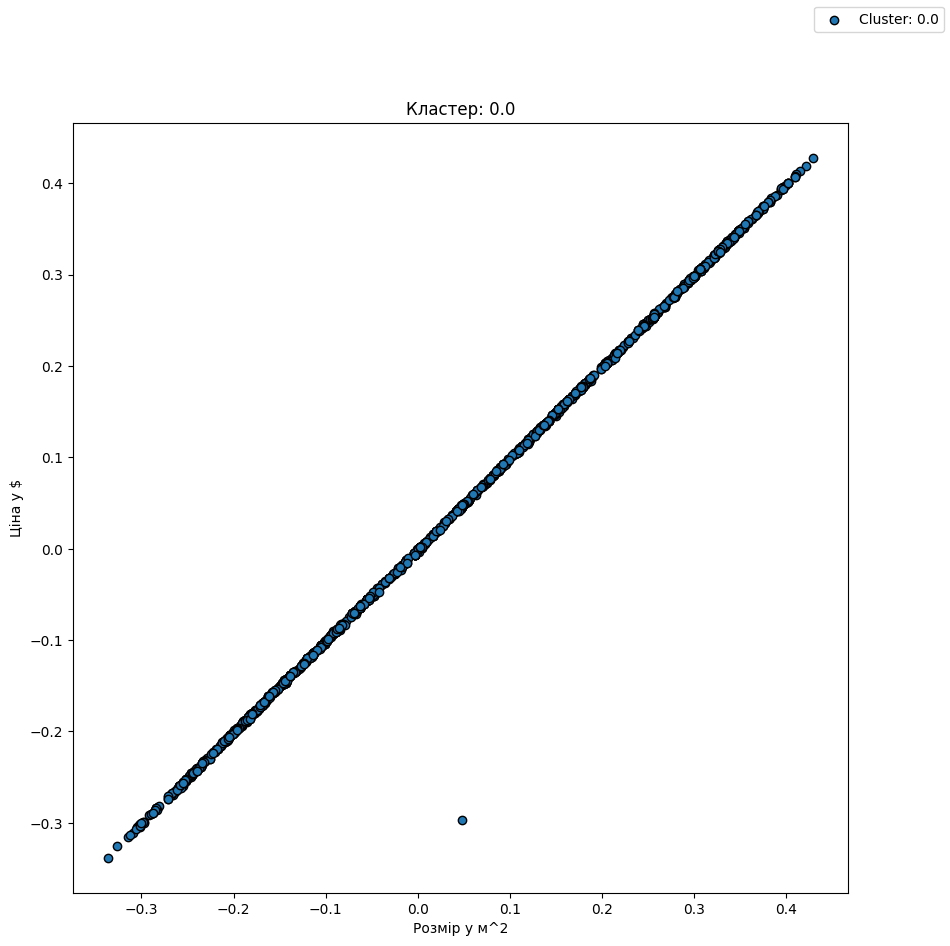

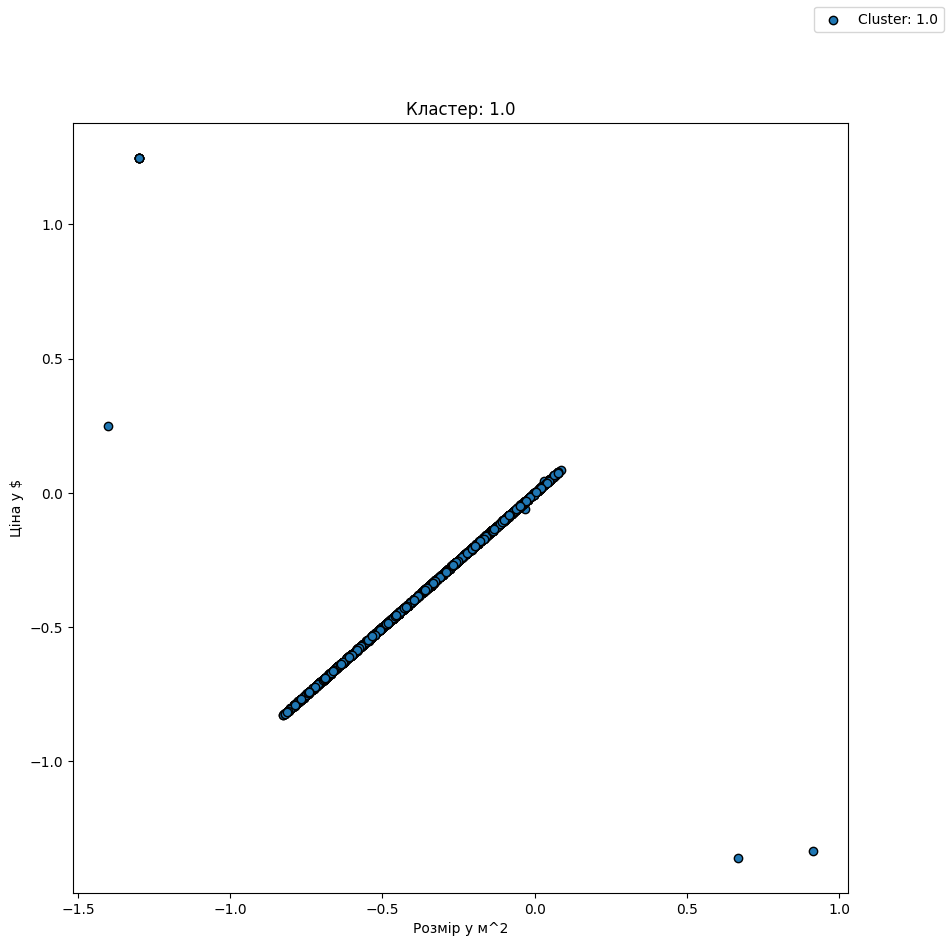

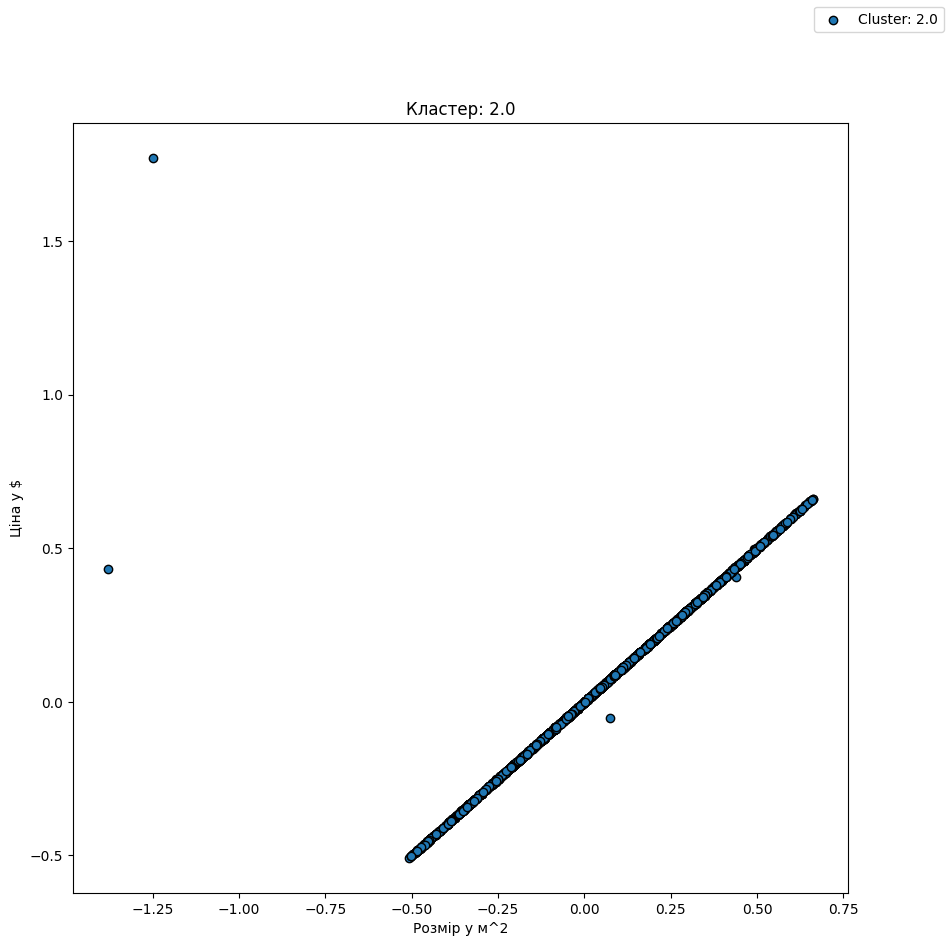

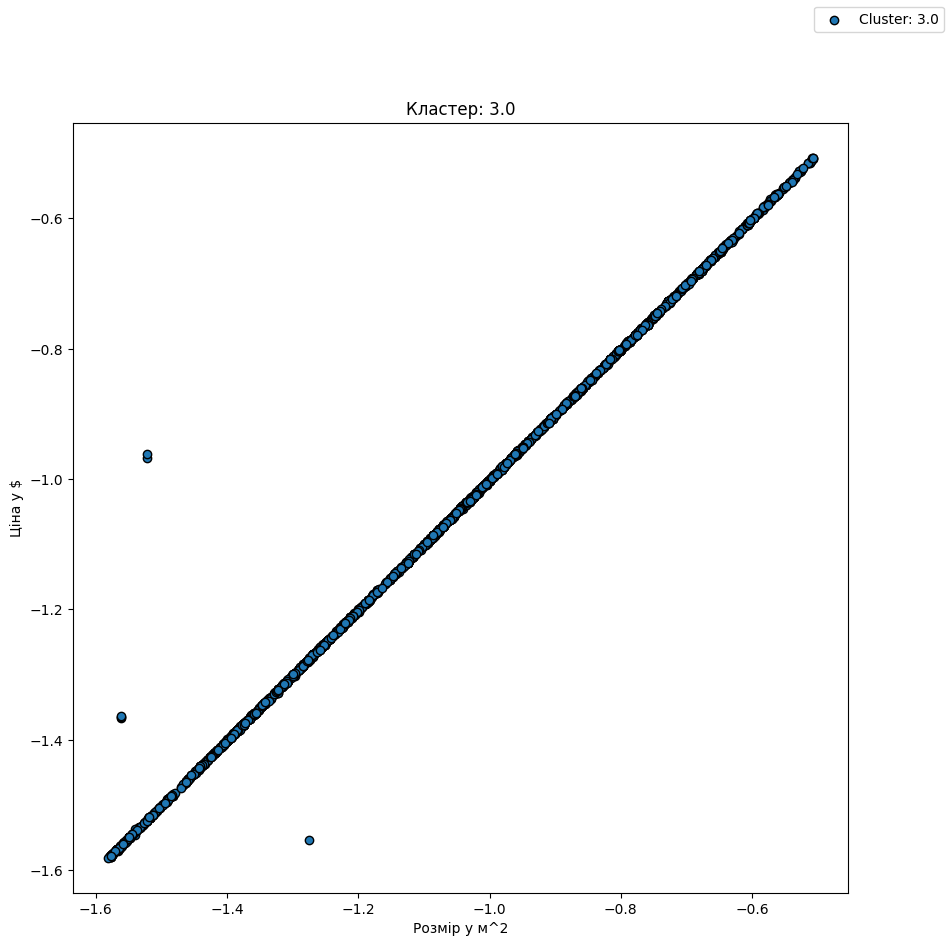

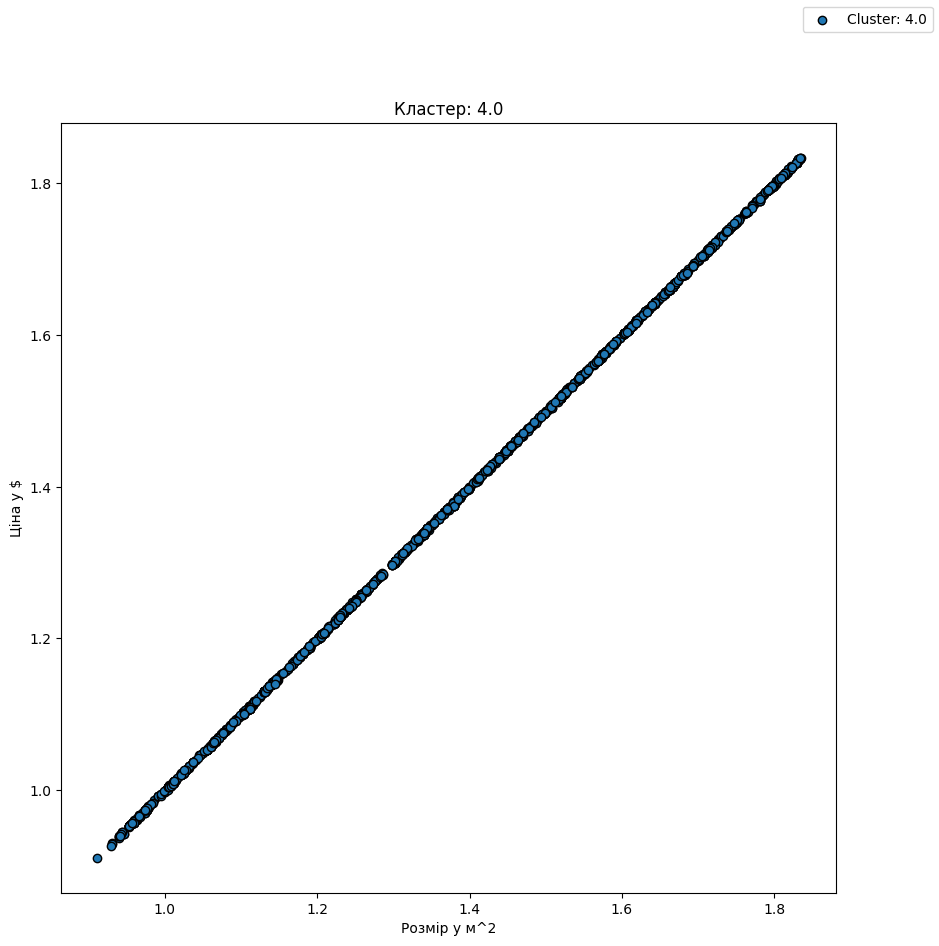

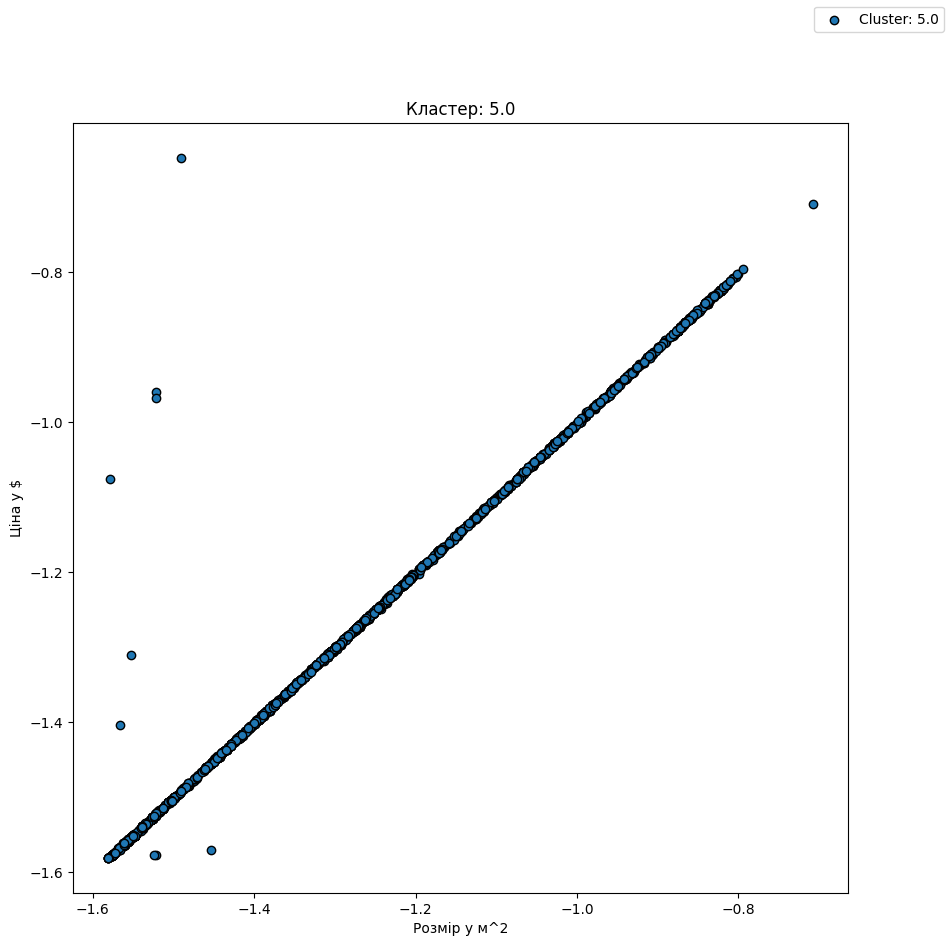

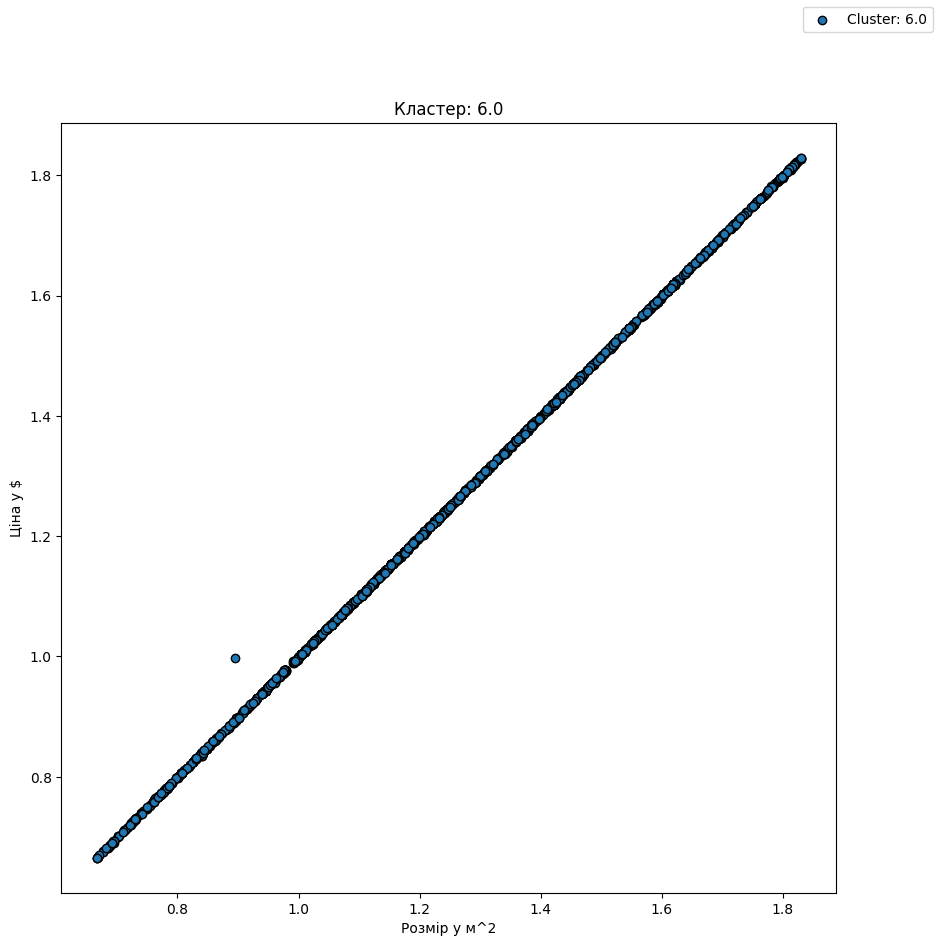

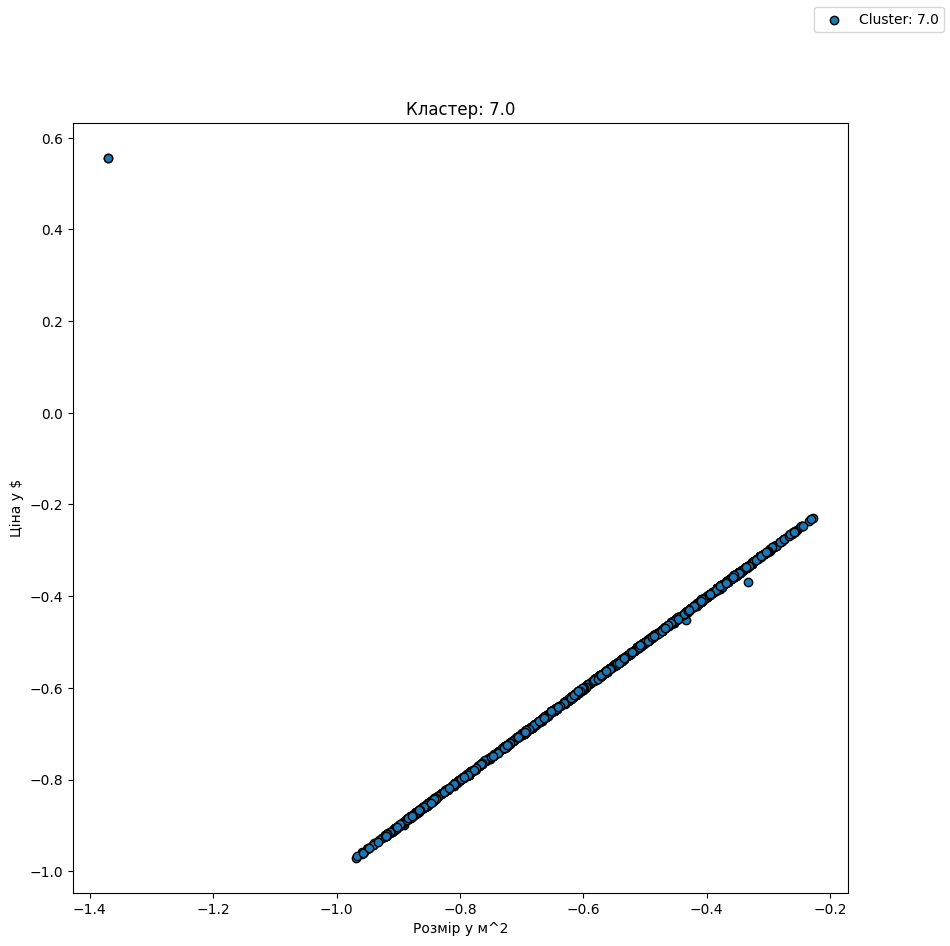

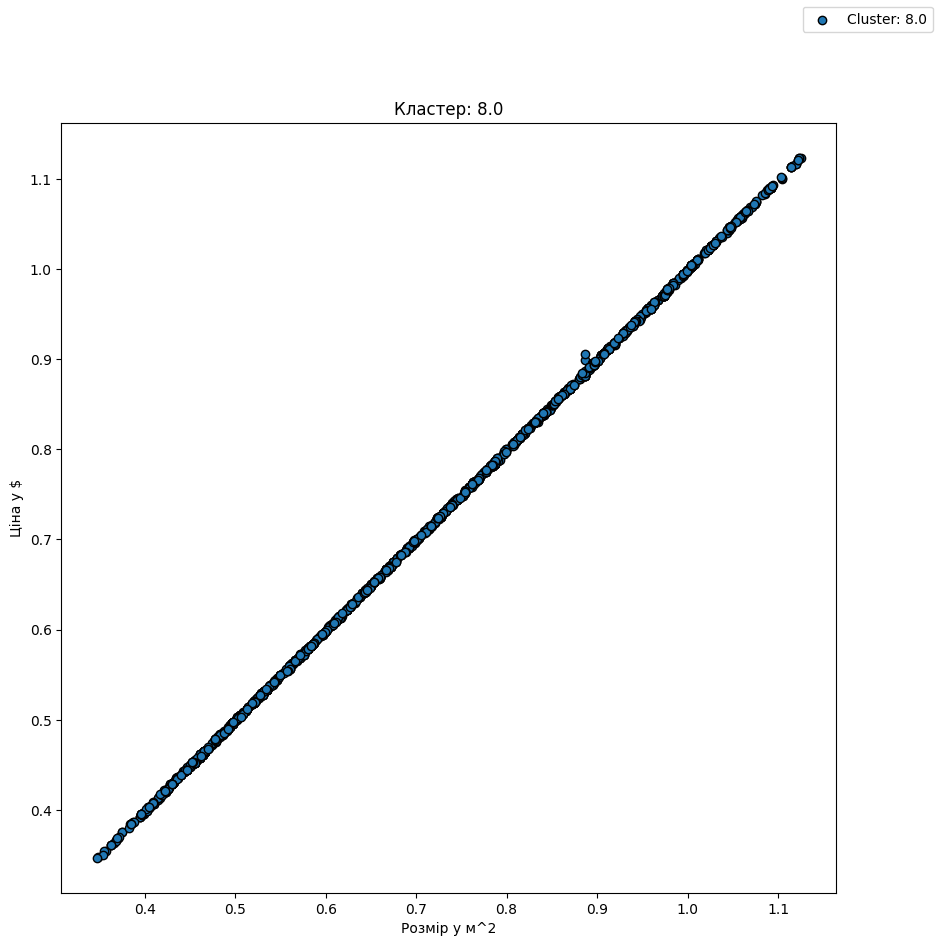

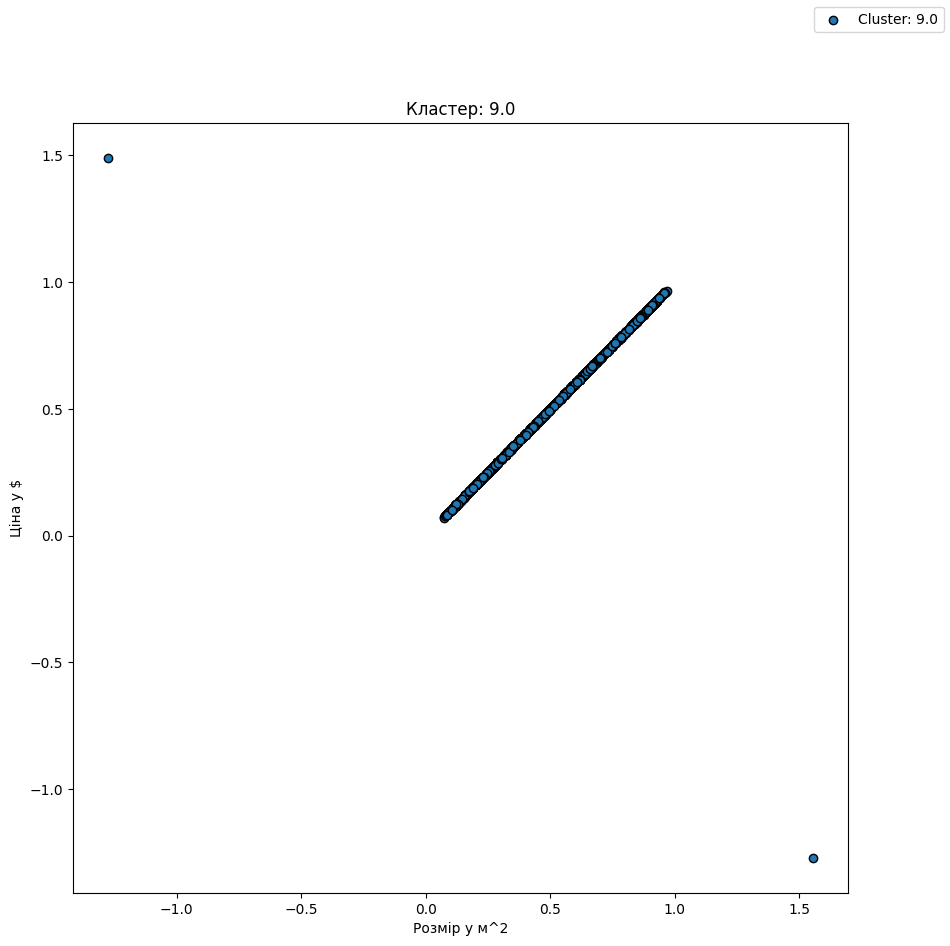

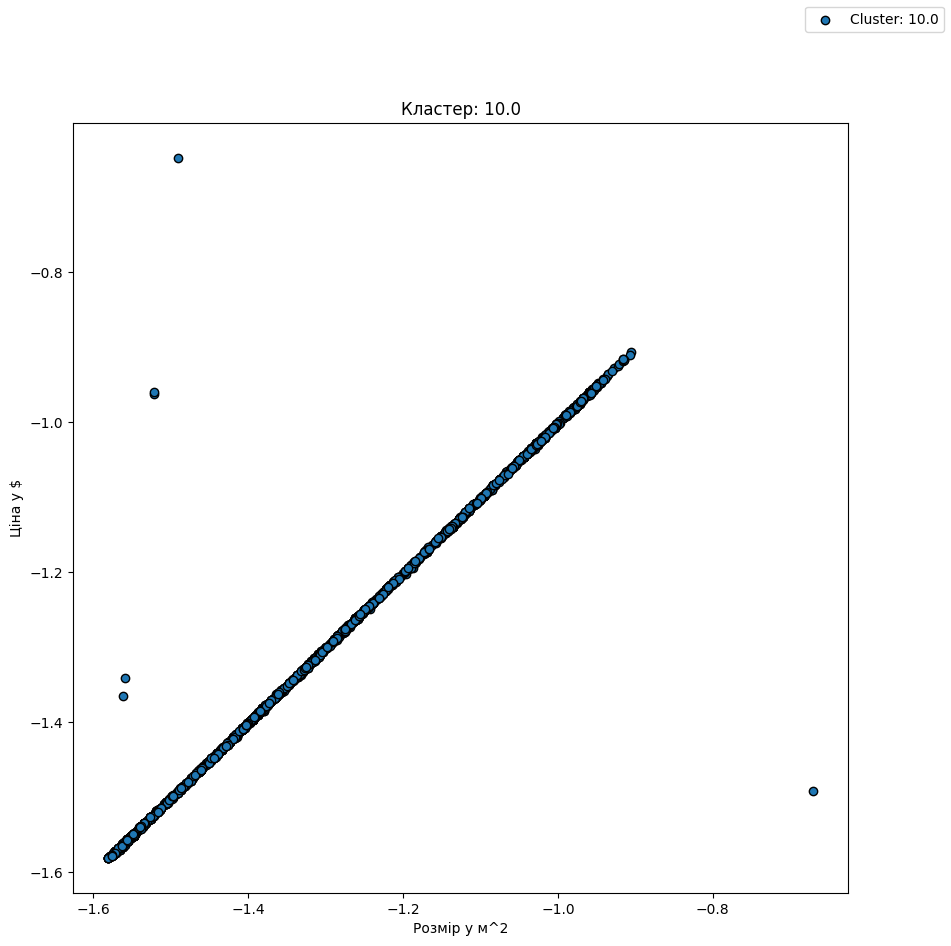

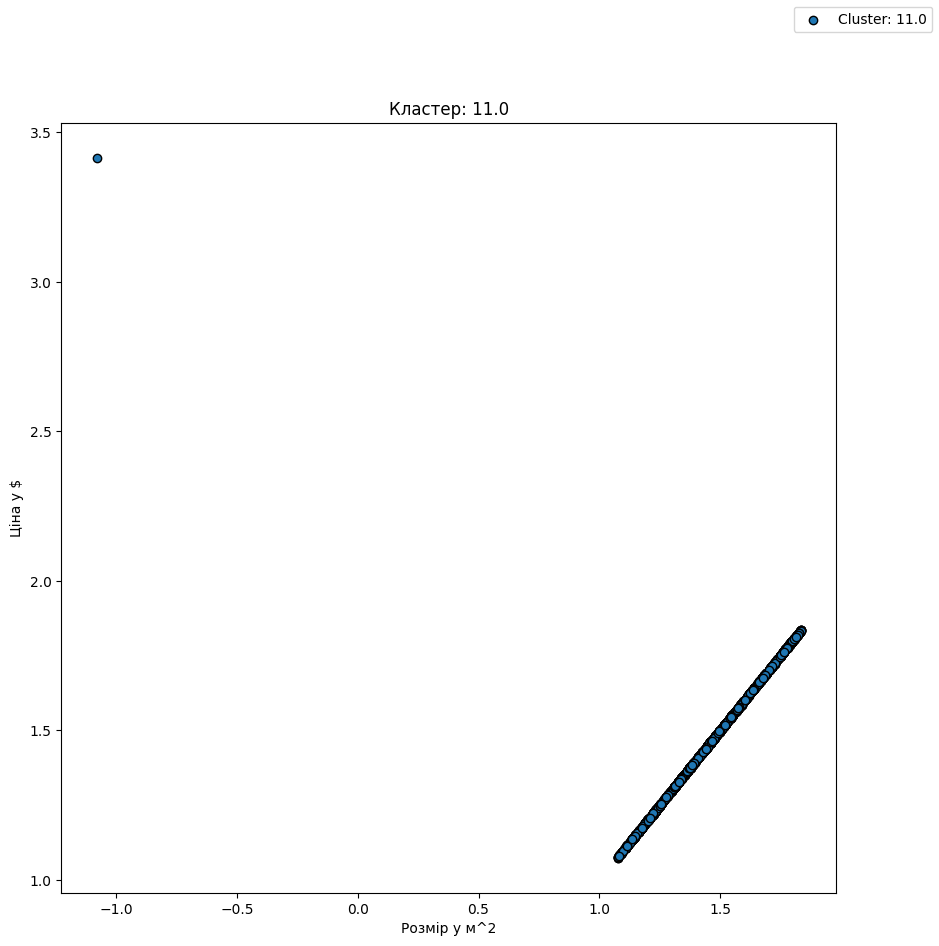

In [4]:
for cluster_id in processed_df["cluster_id"].unique():
    df = processed_df[processed_df["cluster_id"] == cluster_id]
    fig, ax = cluster_visualize(df, title=f"Кластер: {cluster_id}")
    plt.show()

In [14]:
crimes_df = pd.read_csv("datasets/boston_crimes/crime.csv", encoding="windows-1252", on_bad_lines="warn")
crimes_df = crimes_df.fillna(0)
crimes_df["SHOOTING"] = crimes_df["SHOOTING"].replace("Y", 1)
crimes_df["REPORTING_AREA"] = crimes_df["REPORTING_AREA"].replace(" ", 0)

/tmp/ipykernel_16123/3799881030.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crimes_df["SHOOTING"] = crimes_df["SHOOTING"].replace("Y", 1)


/tmp/ipykernel_16123/4279635351.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(cluster_df[x_column], cluster_df[y_column], cmap="viridis", edgecolors="black")


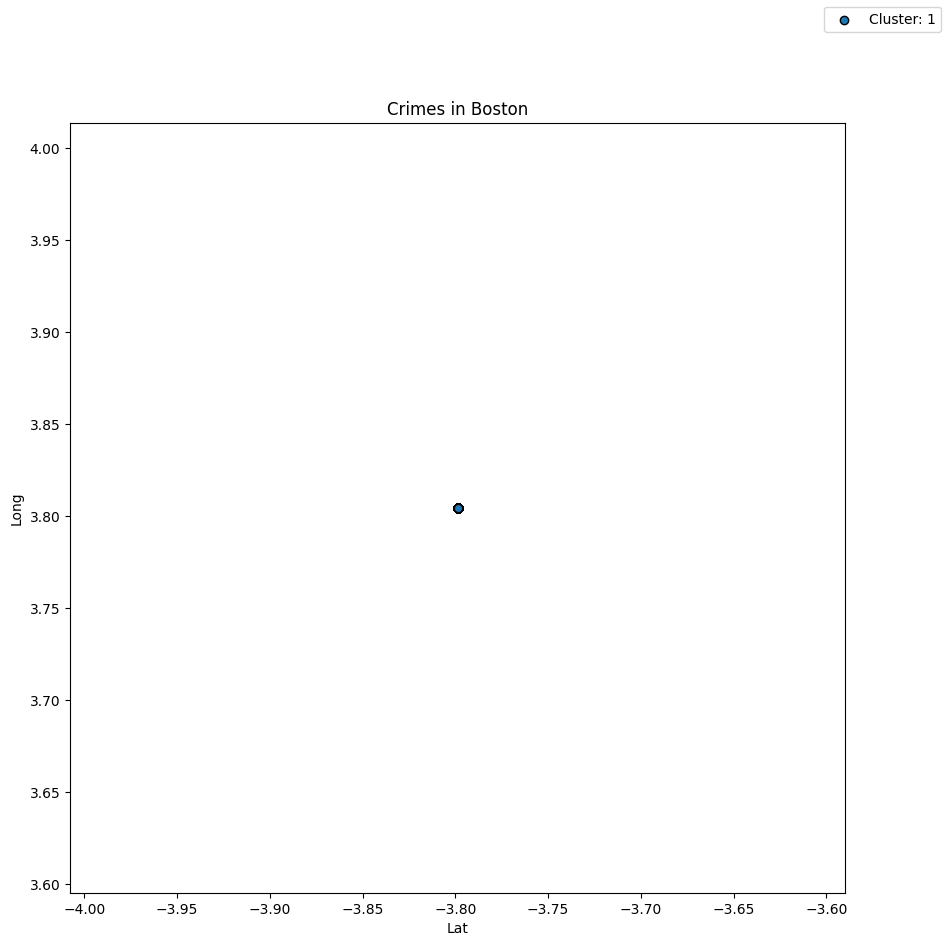

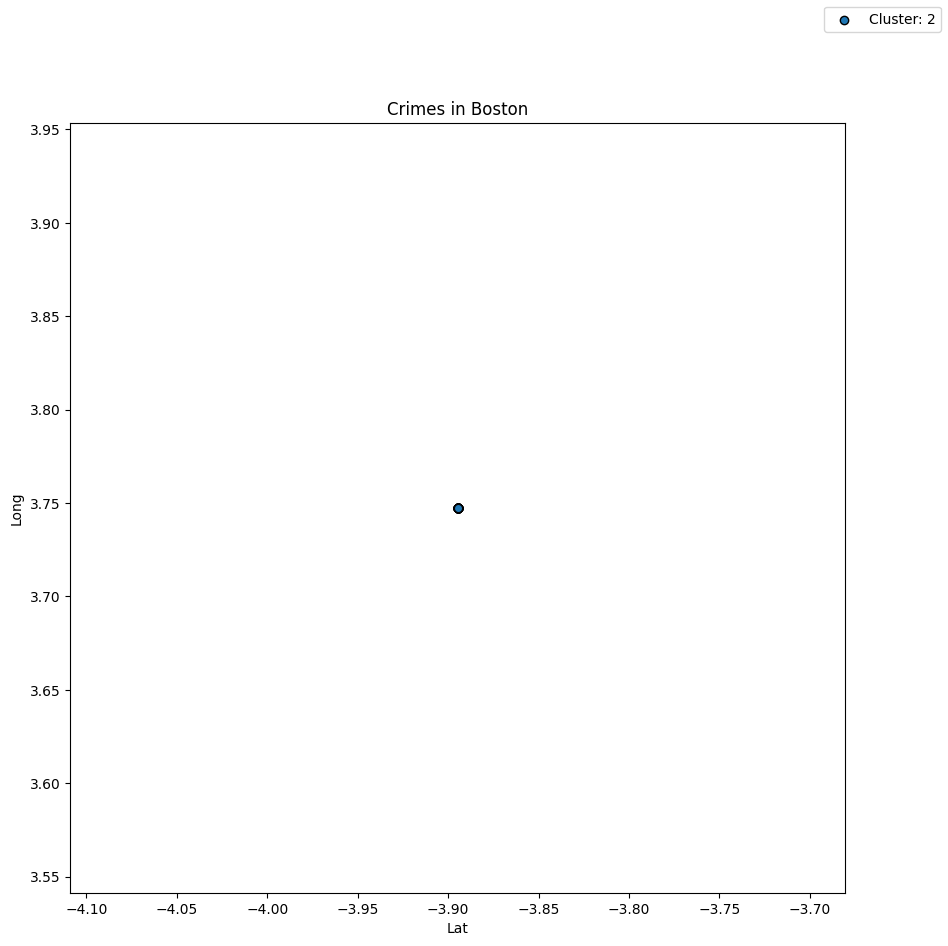

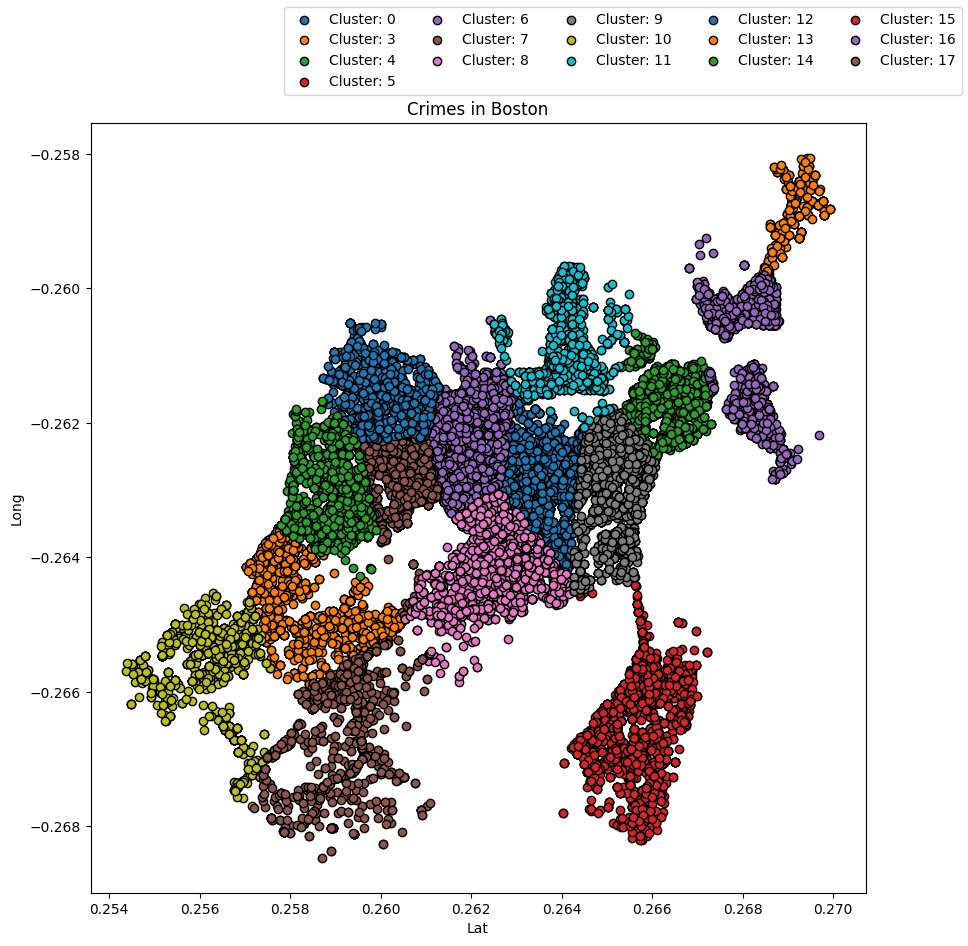

In [18]:
crimes_processed_df = clustering_process(
    crimes_df.iloc[::10, :], 
    KMeans, 
    StandardScaler, 
    main_data_columns=["Lat", "Long"],
    additional_data_columns=["INCIDENT_NUMBER"],
    cluster_setup={"n_clusters": 18}
)
mean = crimes_processed_df["Long"].mean()
crimes_processed_df1 = crimes_processed_df[crimes_processed_df["Long"] > mean]
crimes_processed_df2 = crimes_processed_df[crimes_processed_df["Long"] <= mean]

mean = crimes_processed_df1["Long"].mean()
crimes_processed_df11 = crimes_processed_df1[crimes_processed_df1["Long"] > mean]
crimes_processed_df12 = crimes_processed_df1[crimes_processed_df1["Long"] <= mean]
fig11, ax11 = cluster_visualize(
    crimes_processed_df11, 
    "Lat", 
    "Long", 
    xlabel="Lat", 
    ylabel="Long", 
    title="Crimes in Boston"
)
fig12, ax12 = cluster_visualize(
    crimes_processed_df12, 
    "Lat", 
    "Long", 
    xlabel="Lat", 
    ylabel="Long", 
    title="Crimes in Boston"
)
fig2, ax2 = cluster_visualize(
    crimes_processed_df2, 
    "Lat", 
    "Long", 
    xlabel="Lat", 
    ylabel="Long", 
    title="Crimes in Boston"
)
plt.show()

In [20]:
for cluster_id in crimes_processed_df["cluster_id"].unique():
    print(f"Cluster {cluster_id} length:", 
          len(crimes_processed_df[crimes_processed_df["cluster_id"] == cluster_id]))

Cluster 0 length: 3215
Cluster 1 length: 1985
Cluster 2 length: 79
Cluster 3 length: 1312
Cluster 4 length: 3382
Cluster 5 length: 1008
Cluster 6 length: 3259
Cluster 7 length: 1882
Cluster 8 length: 2521
Cluster 9 length: 3306
Cluster 10 length: 965
Cluster 11 length: 1571
Cluster 12 length: 1697
Cluster 13 length: 314
Cluster 14 length: 1952
Cluster 15 length: 983
Cluster 16 length: 1602
Cluster 17 length: 875
